# Safety Metric - Best Neighborhood in Pittsburgh

### Introduction

For this sub-metric, we used the Monthly Criminal Activity dataset from the Pittsburgh Police Department, which records crime reports by neighborhood.

We initially considered separating violent crimes from property crimes, but ultimately used total crime reports per neighborhood as a straightforward metric.

### The Metric
Safety Metric

Dataset: Monthly Criminal Activity
Features measured:
- total_crimes: total number of crime reports per neighborhood

Calculation:
- safety_score = 1 - (total_crimes / max(total_crimes))
- (higher = safer)

Goal: Identify neighborhoods with the lowest crime activity relative to other neighborhoods.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../datasets/monthly_criminal_activity.csv", low_memory=False, parse_dates=['ReportedDate'])
df.head()

,_id,Report_Number,ReportedDate,ReportedTime,Hour,DayofWeek,ReportedMonth,NIBRS_Coded_Offense,NIBRS_Offense_Code,NIBRS_Offense_Category,NIBRS_Offense_Type,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,XCOORD,YCOORD,Zone,Tract,Neighborhood,Block_Address
0,1,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13A AGGRAVATED ASSAULT,13A,Assault Offenses,Aggravated Assault,Person,A,18 2718 A1 Strangulation Basic - Applying,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
1,2,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13C INTIMIDATION,13C,Assault Offenses,Intimidation,Person,A,18 2706 A1 Terroristic Threats-General,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
2,3,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,90Z ALL OTHER OFFENSES,90Z,All other Offenses,All other Offenses,Group B,B,75 3733 A Fleeing or Attempting To Elude Polic...,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
3,4,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,23H ALL OTHER LARCENY,23H,Larceny/Theft Offenses,All Other Larceny,Property,A,18 3921 A Theft by Unlawful Taking-Movable – L...,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
4,5,PGHP24000017,2024-01-01,00:21,0,Monday,Jan,9999 Vehicle Offense (Not NIBRS Reportable),999,Not NIBRS Reportable,Not NIBRS Reportable,Group B,B,LO 6 101 Discharge of Firearms Prohibited,-80.0243,40.4582,Zone 1,2107,Manchester,"1200 Block of COLUMBUS AVE Pittsburgh, PA"


      Neighborhood  total_crimes  safety_score
68     Saint Clair            25      0.996536
67       Ridgemont            33      0.995428
20       Chartiers            38      0.994735
55   New Homestead            54      0.992519
82  Swisshelm Park            66      0.990856
26   East Carnegie            78      0.989194
30          Esplen            79      0.989055
81     Summer Hill            83      0.988501
59         Oakwood            88      0.987808
66   Regent Square            97      0.986561


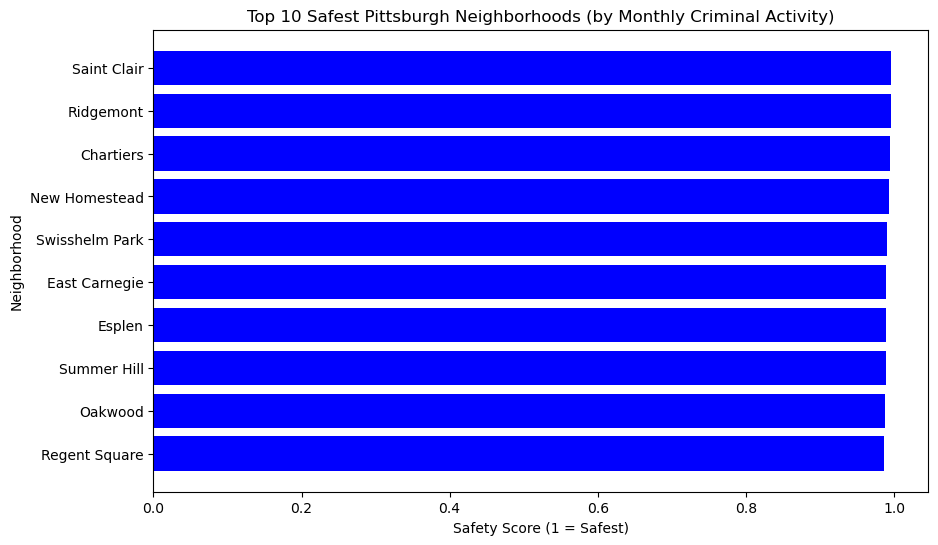

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# 2. Load the Monthly Criminal Activity dataset
crime_df = pd.read_csv("../datasets/monthly_criminal_activity.csv", low_memory=False, parse_dates=['ReportedDate'])

# 3. Aggregate crime counts by neighborhood
neighborhood_crimes = crime_df.groupby('Neighborhood').agg(total_crimes=('Report_Number', 'count')).reset_index()

# 5. Compute safety score
# Higher score = safer neighborhood
# We'll normalize by max crimes so the highest score = 1
neighborhood_crimes['safety_score'] = 1 - (neighborhood_crimes['total_crimes'] / neighborhood_crimes['total_crimes'].max())

# 6. Sort neighborhoods by safety
neighborhood_crimes = neighborhood_crimes.sort_values('safety_score', ascending=False)

# 7. Display top 10 safest neighborhoods
print(neighborhood_crimes.head(10))

# 8. Plot top 10 safest neighborhoods
plt.figure(figsize=(10,6))
plt.barh(neighborhood_crimes.head(10)['Neighborhood'], neighborhood_crimes.head(10)['safety_score'], color='blue')
plt.xlabel('Safety Score (1 = Safest)')
plt.ylabel('Neighborhood')
plt.title('Top 10 Safest Pittsburgh Neighborhoods (by Monthly Criminal Activity)')
plt.gca().invert_yaxis()  # highest on top
plt.show()

### Conclusion
Our data-driven approach identifies neighborhoods based off safety. Through the data it seems that Saint Clair has the highest safety score, meaning they had the least amount of total crimes this month. 